# Planes Megaline

El objetivo de este proyecto es encontrar un modelo para recomendar planes para clientes de Megaline con una precisión mayor a 0.75. Se comparan tres modelos: Regresión Logística, Árbol de Decisión y Bosque de Decisión. Para cada modelo se ajustan los hiperparámetros para obtener la mejor exactitud posible.

## Importación de datos y librerías

En esta sección se importan los paquetes y librerías pertinentes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
users =  pd.read_csv('datasets/users_behavior.csv')

## Inspección inicial de datos.

Se visualizan las características y encabezado del dataset.  Se buscan valores ausentes, duplicados, tipos de dato incorrectos o errores de formato.

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
users.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
users.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
users.duplicated().sum()

0

El dataset se compone de 5 columnas con 3214 filas correspondientes a llamadas, minutos de llamada, mensajes, mb utilizados y tipo de plan. No se observan valores ausentes ni duplicados. Los tipos de dato de cada columna son adecuados.

## Segmentación de datos

A continuación se divide el dataset en tres conjuntos: entrenamiento, validación y prueba. Primero se divide el conjunto de entrenamiento para que sea 60% del dataset original. El resto del dataset se vuelve a dividir en dos partes iguales; validación y prueba, de manera que cada dataset representa 20% del original.

In [7]:
df_train, df_left = train_test_split(users, random_state=12345, test_size = 0.40) #entrenamiento 60% y el resto 40%

#el dataset restante se divide en dos partes iguales
df_valid, df_test = train_test_split(df_left, random_state=12345, test_size = 0.50) #validación 20% y prueba 20%

Se definen las características y el objetivo para cada uno de los datasets. En este caso el objetivo es esablecer el plan más adecuado para cada usuario, esta información es categórica y se encuentra en la columna 'is_ultra', el resto de las columnas se toman como características.

In [8]:
features_train = df_train.drop(columns='is_ultra')
target_train = df_train['is_ultra']

features_valid = df_valid.drop(columns='is_ultra')
target_valid = df_valid['is_ultra']

features_test = df_test.drop(columns='is_ultra')
target_test = df_test['is_ultra'] 

En las siguientes secciones se compara la presición de tres modelos: regresión logística, árbol de desición y bosque de desición.

## Regresión Logística

En este caso se tiene un problema de clasificación, por lo cual se empieza por evaluar un modelo con regresión logística. 

In [9]:
model = LogisticRegression(random_state=12345, solver='liblinear') #establece el modelo de regresión logística

model.fit(features_train, target_train) #entrena el modelo

score_train = model.score(features_train, target_train) #calcula la exactitud del modelo con el conjunto de entrenamiento

score_valid = model.score(features_valid, target_valid) #calcula la exactitud para el conjunto de validación

Se muestran las exactitudes del modelo para el conjunto de entrenamiento y el conjunto de validación.

In [10]:
print(score_train, score_valid)

0.7152489626556017 0.7076205287713841


La exactitud del modelo es menor para el conjunto de validación. 

## Árbol de Decisión

En esta sección se evalua un modelo de árbol de decisión para diferentes niveles de profundidad.

In [11]:
depths = []
train_scores = []
valid_scores = []

for depth in range(1,11): #
    
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
    
    predictions_valid = model.predict(features_valid) # predicciones del modelo en el conjunto de validación
    
    score_train = model.score(features_train, target_train) #exactitud
    score_valid = model.score(features_valid, target_valid)
    
    depths.append(depth)
    train_scores.append(score_train)
    valid_scores.append(score_valid)
    
df1 = pd.DataFrame({'depth':depths, 'train_score':train_scores, 'valid_score':valid_scores })
print(df1)


   depth  train_score  valid_score
0      1     0.757780     0.754277
1      2     0.787863     0.782271
2      3     0.807573     0.785381
3      4     0.810685     0.779160
4      5     0.820021     0.779160
5      6     0.837656     0.783826
6      7     0.855809     0.782271
7      8     0.862552     0.779160
8      9     0.881224     0.782271
9     10     0.889004     0.774495


In [12]:
df1.describe()

,depth,train_score,valid_score
count,10.00000,10.000000,10.000000
mean,5.50000,0.831017,0.778227
std,3.02765,0.041961,0.008955
min,1.00000,0.757780,0.754277
25%,3.25000,0.808351,0.779160
50%,5.50000,0.828838,0.780715
75%,7.75000,0.860866,0.782271
max,10.00000,0.889004,0.785381


La exactitud promedio de los modelos en el conjunto de validación es de 0.778, con una exactitud mínima de 0.754 y una máxima de 0.785, superando al modelo de regresión logística. 

La siguiente gráfica muestra la exactitud en función del nivel máximo de profundidad.

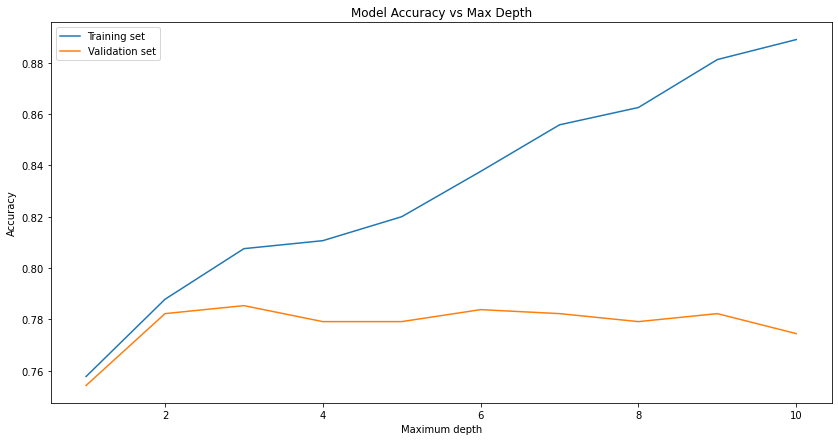

In [13]:
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='depth', y='train_score', data=df1)
sns.lineplot(x='depth', y='valid_score', data=df1)

ax.set_title('Model Accuracy vs Max Depth' )
ax.set_xlabel('Maximum depth')
ax.set_ylabel('Accuracy')
ax.legend(['Training set', 'Validation set'])

Gráfica de número máximo de nodos contra exactitud para el conjunto de entrenamiento y el conjunto de validación. La exactitud del conjunto de entrenamiento aumenta conforme el número de nodos, sin embargo la exactitud del conjunto de validación no aumenta significativamente después de los 2 nodos de profundidad. 

A pesar de eso la exactitud del modelo es superior a la encontrada con el modelo de regresión logística.

## Bosque de Decisión

A continuación se evalúa un modelo de bosque de decisión con diferentes valores para el número de estimadores y nivel de profundidad. 

In [14]:
best_est = 0
best_depth = 0
best_score = 0

estimators=[]
depths = []
train_scores = []
valid_scores = []

for est in range(10, 101, 10): #se crea un modelo para cada número de estimadores
    
    for depth in range(1,11): #para cada número de estimadores se establece el nivel de profundidad
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)# establece el modelo de bosque
        
        model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
        
        score_train = model.score(features_train, target_train) #exactitud para el conjunto de entrenamiento

        score_valid = model.score(features_valid, target_valid) #exactitud para el conjunto de validación
        
        #guarda los datos de estimadores, profundidad y exactitud para cada modelo
        estimators.append(est)
        depths.append(depth)
        train_scores.append(score_train)
        valid_scores.append(score_valid)
        
        
        if score_valid > best_score:
            best_score = score_valid
            best_est = est
            best_depth = depth
            
df2 = pd.DataFrame({'estimators': estimators, 'depth':depths, 'train_score':train_scores, 'valid_score':valid_scores })

print(f"El mejor modelo de bosque tiene  {best_est} estimadores,  {best_depth} de max_depth, con un score de {best_score}")

El mejor modelo de bosque tiene  40 estimadores,  8 de max_depth, con un score de 0.8087091757387247


Text(0, 0.5, 'Accuracy')

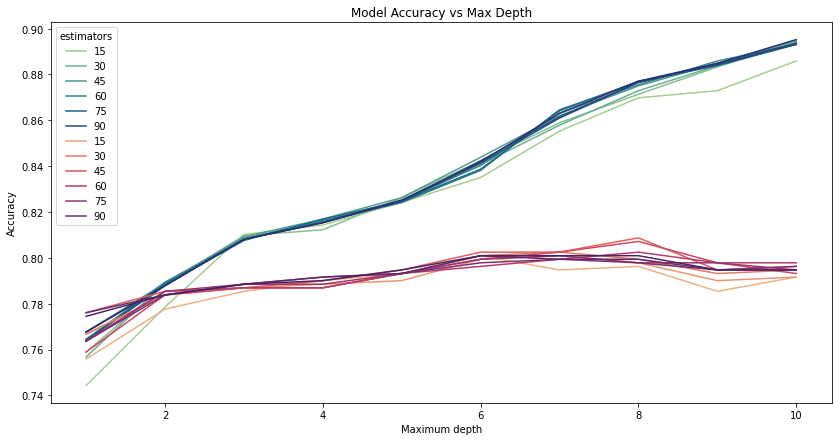

In [15]:
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='depth', y='train_score', hue='estimators', palette='crest', data=df2)
sns.lineplot(x='depth', y='valid_score', hue='estimators', palette='flare', data=df2)

ax.set_title('Model Accuracy vs Max Depth' )
ax.set_xlabel('Maximum depth')
ax.set_ylabel('Accuracy')


Gráfico de exactitud contra número máximo de nodos para el conjunto de entrenamiento (azules y verdes) y validación (violetas, rojos, naranjas), desglosado por número de estimadores. La exactitud del conjunto de entrenamiento aumenta conforme el número máximo de nodos, sin embargo la exactitud del conjunto de validación es más estable, alcanza un máximo en 8.

El número de estimadores parece no aumentar significativamente la exactitud después de cierto rango, lo cual se puede observar en la siguiente gráfica.

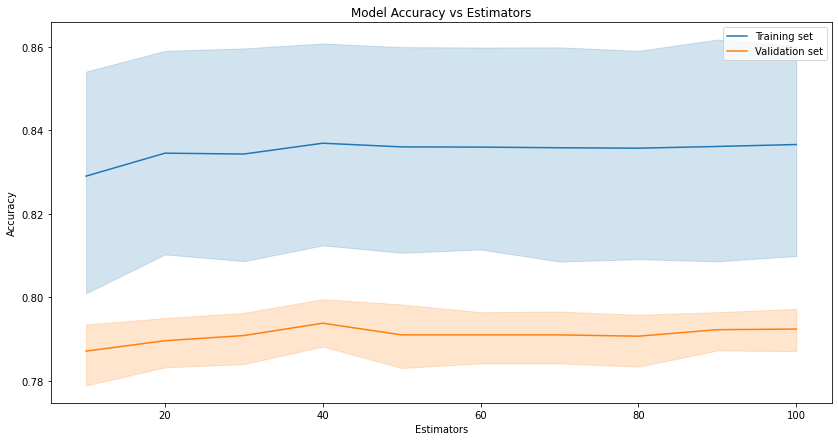

In [16]:
f, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x='estimators', y='train_score', data=df2)
sns.lineplot(x='estimators', y='valid_score', data=df2)

ax.set_title('Model Accuracy vs Estimators' )
ax.set_xlabel('Estimators')
ax.set_ylabel('Accuracy')
ax.legend(['Training set', 'Validation set'])

Gráfico de exactitud contra número de estimadores para el conjunto de entrenamiento (azul) y de validación (naranja). No se observa aumento significativo en la exactitud después de los 40 estimadores. 

## Modelo final

Dada la información anterior el modelo con mayor exactitud para el conjunto de validación es el de Bosque de Decisión, con 40 estimadores y 8 niveles. 

A continuación se entrena y evalua el modelo en el conjunto de prueba.

In [17]:
final_model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=8)# entrena el modelo en el conjunto de entrenamiento
        
final_model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
        
score_test = final_model.score(features_test, target_test) #evalua la presición del modelo con el dataset de prueba

print(f'La precisión del modelo final es {score_test}')

La precisión del modelo final es 0.7962674961119751


## Conclusiones

Se evaluaron las presiciones de tres modelos: Regresión Logística, Árbol de Decisión y Bosque de Decisión para la recomendación de dos planes de la compañía Megaline. 

El modelo de regresión logística tuvo la exactitud más baja, con una exactitud de 0.707. 

La exactitud promedio de los modelos de árbol de decisión  en el conjunto de validación es de 0.778, con una exactitud mínima de 0.754 y una máxima de 0.785. 

El mejor modelo de bosque tiene  40 estimadores,  8 niveles de profundidad, con una exactitud en el conjunto de validación de 0.809.

Por lo anterior el modelo final se establece como un bosque de decisión con 40 estimadores y 8 niveles. Estos valores de hiperparámetros ofrecen una exactitud superior al 0.75, con un poder computacional relativamente bajo.

La exactitud del modelo final en el conjunto de prueba es 0.796.